# **BUSINESS UNDERSTANDING**


## **Business Objective**

Tujuan Utama analisis ini adalah untuk menganalisis penjualan *Video Game* pada tahun 2024 guna untuk mengidentifikasi *Genre* apa yang mengalami penjualan tertinggi, Developer apa yang paling banyak diminati, *Video Game* jenis Konsol apa yang paling banyak di minati, dan wilayah mana yang memiliki penjualan terbesar. Selain itu, tujuan ini untuk melihat tinggi rendahnya korelasi antara skor kritik dan total penjualan.

## **Assess Situation**

Situasi yang mendasari analisis ini adalah persaingan atau kompetitif antar developer dan perbedaan hasil penjualan berdasarkan wilayah. perubahan tren seperti genre dan jenis konsol yang diminati oleh konsumen mengharuskan para developer untuk memiliki pemahaman yang mendalam terhadap minat konsumen. pengembangan jenis game yang inovatif dan tidak hanya "itu-itu" saja juga sangat diperlukan agar dapat memberikan pengalaman yang baik dan konsumen tidak merasa bosan.

## **Data Mining Goals**

Menganalisis tren penjualan video game untuk memberikan wawasan bagi publisher dan developer dalam meningkatkan strategi. Mengidentifikasi minat konsumen terhadap *Video game* dengan mengamati pola pembelian data penjualan *Video Game* pada tahun 2024, serta menganalisis informasi tentang penjualan video game, termasuk judul, platform, genre, publisher, developer, skor kritik, dan total penjualan di berbagai wilayah yang bertujuan untuk memahami tren dan pola penjualan, Strategi Pemasaran dan Prediksi Penjualan untuk kedepannya.

## **Project Plan**

Langkah-langkah yang di ambil untuk menganalisis data ini mencakup Preprocessing Data (membersihkan data), Analisis penjualan di berbagai wilayah, menganalisis fitur-fitur yang ada di data (Nama Game, Genre, jenis console, Tahun Rilis, Publisher dan Developer, Total Penjualan(Keseluruhan dan masing-masing wilayah)). Rencana ini dilakukan guna Memberikan pandangan atau informasi kepada publisher, developer, dan tim pemasaran dalam meningkatkan strategi distribusi dan promosi.

# **SUMBER DATA**

## Dataset diambil dari
[Kaggle - Video Game Sales] (https://www.kaggle.com/datasets/hosammhmdali/video-game-sales-2024)

# **DATA PREPARATION**

## **READ** **DATA**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv("Video Game Sales 2024.csv")

df

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,NaN,NaN,NaN,NaN,NaN,2016-08-11,2019-01-28
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,NaN,NaN,NaN,NaN,NaN,2020-07-30,2020-05-09
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-28,2019-02-24


## **PENGECEKKAN DATA**

### **MISSING VALUES**

In [26]:
print((df.isna().sum() / len(df)) * 100)

img              0.000000
title            0.000000
console          0.000000
genre            0.000000
publisher        0.000000
developer        0.026556
critic_score    89.568233
total_sales     70.441765
na_sales        80.259623
jp_sales        89.493252
pal_sales       79.967508
other_sales     76.368408
release_date    11.014434
last_update     72.071045
dtype: float64


### **DUPLICATE VALUES**

In [27]:
df[df.duplicated()]

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update


### **OUTLIERS** **VALUES**

In [28]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
critic_score,0.231192
total_sales,3.066421
na_sales,1.890152
jp_sales,0.984129
pal_sales,2.201012
other_sales,3.016433


### **INCONSISTENT** **VALUES**

In [29]:
df['console'].unique()

array(['PS3', 'PS4', 'PS2', 'X360', 'XOne', 'PC', 'PSP', 'Wii', 'PS',
       'DS', '2600', 'GBA', 'NES', 'XB', 'PSN', 'GEN', 'PSV', 'DC', 'N64',
       'SAT', 'SNES', 'GBC', 'GC', 'NS', '3DS', 'GB', 'WiiU', 'WS', 'VC',
       'NG', 'WW', 'SCD', 'PCE', 'XBL', '3DO', 'GG', 'OSX', 'Mob', 'PCFX',
       'Series', 'All', 'iOS', '5200', 'And', 'DSiW', 'Lynx', 'Linux',
       'MS', 'ZXS', 'ACPC', 'Amig', '7800', 'DSi', 'AJ', 'WinP', 'iQue',
       'GIZ', 'VB', 'Ouya', 'NGage', 'AST', 'MSD', 'S32X', 'XS', 'PS5',
       'Int', 'CV', 'Arc', 'C64', 'FDS', 'MSX', 'OR', 'C128', 'CDi',
       'CD32', 'BRW', 'FMT', 'ApII', 'Aco', 'BBCM', 'TG16'], dtype=object)

In [30]:
df['release_date'].unique()

array(['2013-09-17', '2014-11-18', '2002-10-28', ..., '2018-04-02',
       '2021-03-24', '2016-08-11'], dtype=object)

In [31]:
df['genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Simulation', 'Racing', 'Music', 'Misc', 'Fighting', 'Platform',
       'Adventure', 'Strategy', 'Puzzle', 'MMO', 'Sandbox', 'Party',
       'Education', 'Board Game', 'Visual Novel'], dtype=object)

## **PENANGANAN DATA**

### **MISSING VALUES**

Melakukan Penghapusan pada 'critic_score', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales', dan 'last_update'

In [32]:
df = df.drop('critic_score', axis=1)
df = df.drop('na_sales', axis=1)
df = df.drop('jp_sales', axis=1)
df = df.drop('pal_sales', axis=1)
df = df.drop('other_sales', axis=1)
df = df.drop('last_update', axis=1)

In [13]:
df

,img,title,console,genre,publisher,developer,total_sales,release_date
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,20.32,2013-09-17
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,19.39,2014-11-18
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,16.15,2002-10-28
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,15.86,2013-09-17
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,15.09,2015-11-06
...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,NaN,2016-08-11
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,2020-07-30
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,NaN,2020-07-30
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,NaN,2019-02-28


Untuk 'developer' dan 'release_date' karena bertipe Object untuk 'developer' dan 'release_date' akan di Imputasi dengan 'unknown' karena data yang banyak dan tidak dapat di hapus satu satu, sedangkan 'total_sales' akan di imputasikan dengan hasil mean nya.

**'developer'**

In [77]:
df['developer'] = df['developer'].fillna("Unknown")

**'release_date'**

In [78]:
df['release_date'] = df['release_date'].fillna("Unknown")

**'total_sales'**

In [38]:
df['total_sales'].dropna().describe()

,total_sales
count,18922.000000
mean,0.349113
std,0.807462
min,0.000000
25%,0.030000
50%,0.120000
75%,0.340000
max,20.320000


In [39]:
df['total_sales'] = df['total_sales'].fillna(df['total_sales'].dropna().mean())

lalu melakukan pengecekkan untuk melihat Missing Values nya

In [79]:
print((df.isna().sum() / len(df)) * 100)

img             0.0
title           0.0
console         0.0
genre           0.0
publisher       0.0
developer       0.0
total_sales     0.0
release_date    0.0
dtype: float64


In [81]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio %'])

,Null Ratio %
img,0.0
title,0.0
console,0.0
genre,0.0
publisher,0.0
developer,0.0
total_sales,0.0
release_date,0.0


### **DUPLICATE VALUES**

In [82]:
df = df.drop_duplicates()

In [83]:
df

,img,title,console,genre,publisher,developer,total_sales,release_date
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,0.349113,2013-09-17
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,0.349113,2014-11-18
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,0.349113,2002-10-28
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.349113,2013-09-17
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,0.349113,2015-11-06
...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,0.349113,2016-08-11
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.349113,2020-07-30
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.349113,2020-07-30
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,0.349113,2019-02-28


### **OUTLIERS** **VALUES**

Karena terjadi penghapusan beberapa kolom, maka dilakukan pengecekan ulang untuk outliers valuesnya

In [84]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
total_sales,0.0


Melakukan Imputasi

In [85]:
columns_to_impute = ["total_sales"]

for col in columns_to_impute:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)

Setelah itu melakukan pengecekkan ulang

In [86]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
total_sales,0.0


### **Inconsistent** **Values**

Karena tidak ada ditemukan inconsistent values di dataset ini, inconsistent values tidak perlu ditangani

## **MELAKUKAN CONSTRUCT** **DATA**

In [87]:
df["percentage_total_sales"] = df["total_sales"] / 100

In [88]:
df

,img,title,console,genre,publisher,developer,total_sales,release_date,percentage_total_sales
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,0.349113,2013-09-17,0.003491
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,0.349113,2014-11-18,0.003491
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,0.349113,2002-10-28,0.003491
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.349113,2013-09-17,0.003491
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,0.349113,2015-11-06,0.003491
...,...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,0.349113,2016-08-11,0.003491
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.349113,2020-07-30,0.003491
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.349113,2020-07-30,0.003491
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,0.349113,2019-02-28,0.003491


## **MELAKUKAN REDUCTION** **DATA**

Menghapus 'percentage_total_sales' karena merasa data ini tidak dibutuhkan

In [89]:
df = df.drop('percentage_total_sales', axis=1)

In [90]:
df

,img,title,console,genre,publisher,developer,total_sales,release_date
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,0.349113,2013-09-17
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,0.349113,2014-11-18
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,0.349113,2002-10-28
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,0.349113,2013-09-17
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,0.349113,2015-11-06
...,...,...,...,...,...,...,...,...
64011,/games/boxart/full_2779838AmericaFrontccc.jpg,XBlaze Lost: Memories,PC,Visual Novel,Aksys Games,Arc System Works,0.349113,2016-08-11
64012,/games/boxart/full_8031506AmericaFrontccc.jpg,"Yoru, Tomosu",PS4,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.349113,2020-07-30
64013,/games/boxart/full_6553045AmericaFrontccc.jpg,"Yoru, Tomosu",NS,Visual Novel,Nippon Ichi Software,Nippon Ichi Software,0.349113,2020-07-30
64014,/games/boxart/full_6012940JapanFrontccc.png,Yunohana SpRING! ~Mellow Times~,NS,Visual Novel,Idea Factory,Otomate,0.349113,2019-02-28


# **VISUALISASI** **DATA**

## **Genre yang Paling Banyak di Rilis**

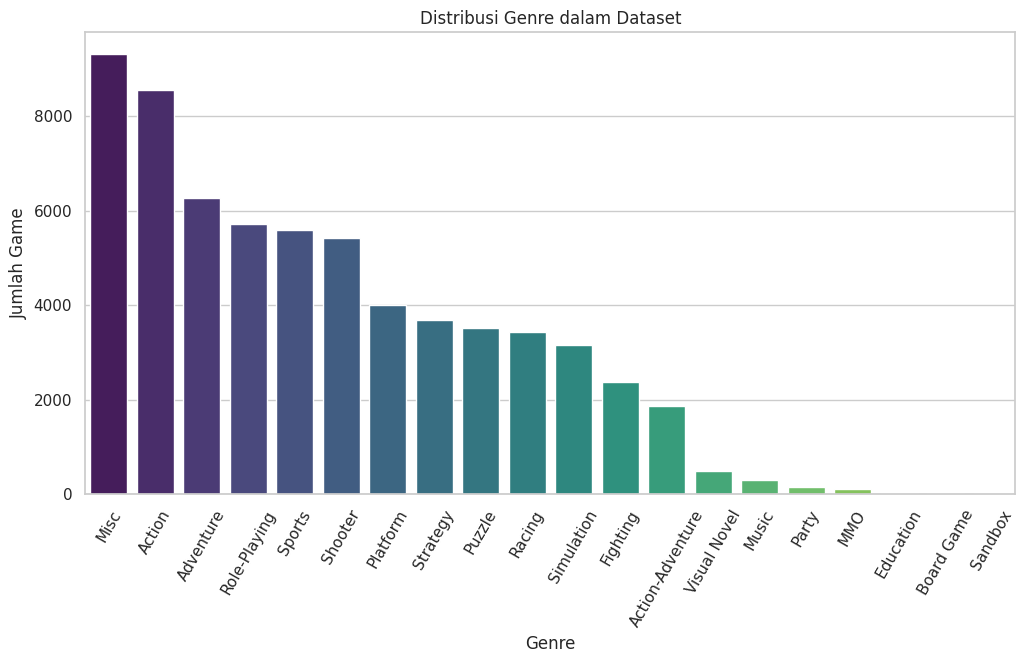

In [96]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
genre_counts = df['genre'].value_counts()
sns.barplot(x=genre_counts.index, y=genre_counts.values, hue=genre_counts.index, palette="viridis", legend=False)
plt.xticks(rotation=60)
plt.xlabel("Genre")
plt.ylabel("Jumlah Game")
plt.title("Distribusi Genre dalam Dataset")
plt.show()

Genre yang paling Banyak dalam dataset adalah Misc, Action, dan Adventure, yang menunjukkan bahwa game dengan tema unik, aksi, Petualangan memiliki lebih banyak peluang untuk diminati banyak orang.

sedangkan Genre dengan jumlah game yang lebih sedikit bisa jadi kurang populer atau kurang diminati oleh banyak orang.

## **Jenis Konsol yang paling banyak terjual**

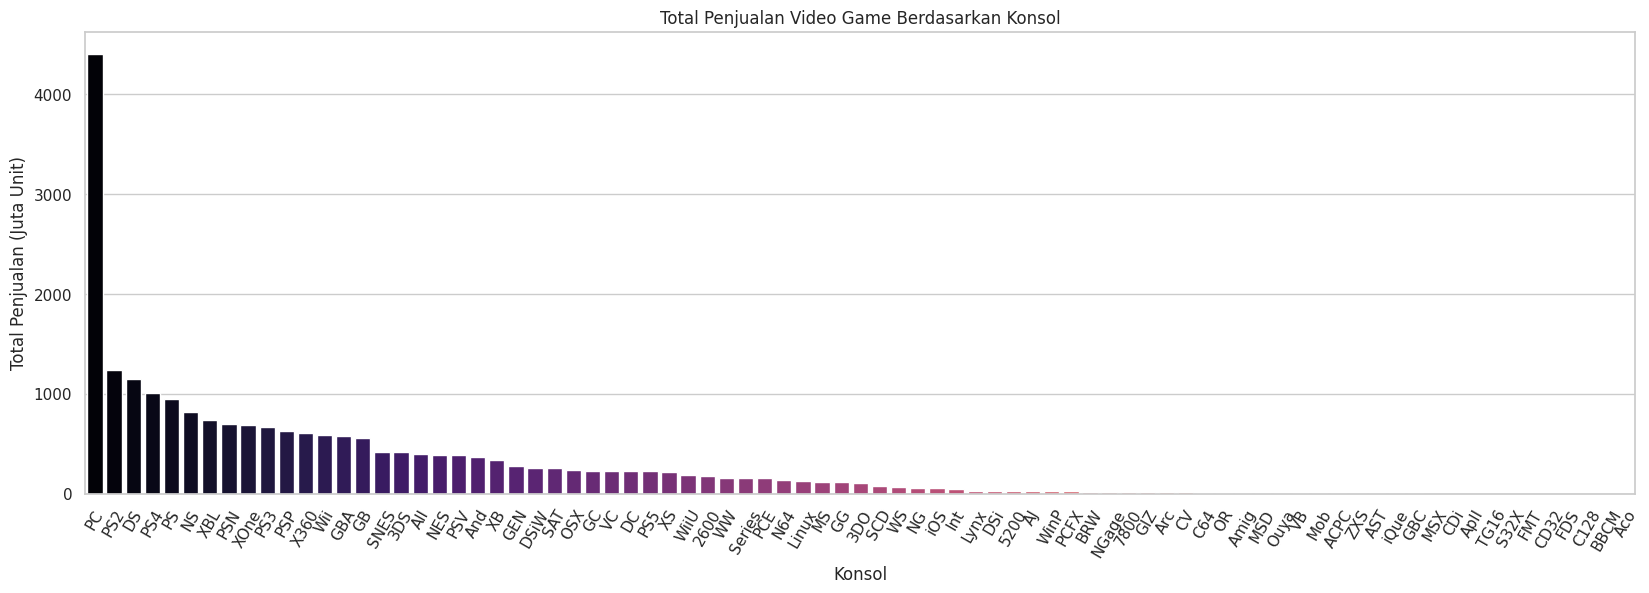

In [105]:
console_sales = df.groupby("console")["total_sales"].sum().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
sns.barplot(x=console_sales.index, y=console_sales.values,hue=console_sales.index, palette="magma", legend=False)
plt.xticks(rotation=60)
plt.xlabel("Konsol")
plt.ylabel("Total Penjualan (Juta Unit)")
plt.title("Total Penjualan Video Game Berdasarkan Konsol")
plt.show()

Konsol dengan penjualan tertinggi adalah PC, PS2, dan Nintendo DS, yang menandakan bahwa pada era konsol ini memiliki pasar yang besar dan sangat diminati oleh banyak orang dan kalangan.